In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:,1:].values

In [38]:
print(X)

[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]
 ['Male' 67 19 14]
 ['Female' 35 19 99]
 ['Female' 58 20 15]
 ['Female' 24 20 77]
 ['Male' 37 20 13]
 ['Male' 22 20 79]
 ['Female' 35 21 35]
 ['Male' 20 21 66]
 ['Male' 52 23 29]
 ['Female' 35 23 98]
 ['Male' 35 24 35]
 ['Male' 25 24 73]
 ['Female' 46 25 5]
 ['Male' 31 25 73]
 ['Female' 54 28 14]
 ['Male' 29 28 82]
 ['Female' 45 28 32]
 ['Male' 35 28 61]
 ['Female' 40 29 31]
 ['Female' 23 29 87]
 ['Male' 60 30 4]
 ['Female' 21 30 73]
 ['Male' 53 33 4]
 ['Male' 18 33 92]
 ['Female' 49 33 14]
 ['Female' 21 33 81]
 ['Female' 42 34 17]
 ['Female' 30 34 73]
 ['Female' 36 37 26]
 ['Female' 20 37 75]
 ['Female' 65 38 35]
 ['Male' 24 38 92]
 ['Male' 48 39 36]
 ['Female' 31 39 61]
 ['Female' 49 39 28]
 ['Female' 24 39 65]
 ['Female' 50 40 55]
 ['Female' 27 40 47]
 ['Female' 29 40 42]
 ['Female' 31

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [0])  # apply OneHotEncoder to column 0
    ],
    remainder='passthrough'  # keep the other columns (like column 1) as is
)

In [41]:
X = column_transformer.fit_transform(X)

In [42]:
print(X)

[[0.0 1.0 19 15 39]
 [0.0 1.0 21 15 81]
 [1.0 0.0 20 16 6]
 [1.0 0.0 23 16 77]
 [1.0 0.0 31 17 40]
 [1.0 0.0 22 17 76]
 [1.0 0.0 35 18 6]
 [1.0 0.0 23 18 94]
 [0.0 1.0 64 19 3]
 [1.0 0.0 30 19 72]
 [0.0 1.0 67 19 14]
 [1.0 0.0 35 19 99]
 [1.0 0.0 58 20 15]
 [1.0 0.0 24 20 77]
 [0.0 1.0 37 20 13]
 [0.0 1.0 22 20 79]
 [1.0 0.0 35 21 35]
 [0.0 1.0 20 21 66]
 [0.0 1.0 52 23 29]
 [1.0 0.0 35 23 98]
 [0.0 1.0 35 24 35]
 [0.0 1.0 25 24 73]
 [1.0 0.0 46 25 5]
 [0.0 1.0 31 25 73]
 [1.0 0.0 54 28 14]
 [0.0 1.0 29 28 82]
 [1.0 0.0 45 28 32]
 [0.0 1.0 35 28 61]
 [1.0 0.0 40 29 31]
 [1.0 0.0 23 29 87]
 [0.0 1.0 60 30 4]
 [1.0 0.0 21 30 73]
 [0.0 1.0 53 33 4]
 [0.0 1.0 18 33 92]
 [1.0 0.0 49 33 14]
 [1.0 0.0 21 33 81]
 [1.0 0.0 42 34 17]
 [1.0 0.0 30 34 73]
 [1.0 0.0 36 37 26]
 [1.0 0.0 20 37 75]
 [1.0 0.0 65 38 35]
 [0.0 1.0 24 38 92]
 [0.0 1.0 48 39 36]
 [1.0 0.0 31 39 61]
 [1.0 0.0 49 39 28]
 [1.0 0.0 24 39 65]
 [1.0 0.0 50 40 55]
 [1.0 0.0 27 40 47]
 [1.0 0.0 29 40 42]
 [1.0 0.0 31 40 42]
 [1.0 

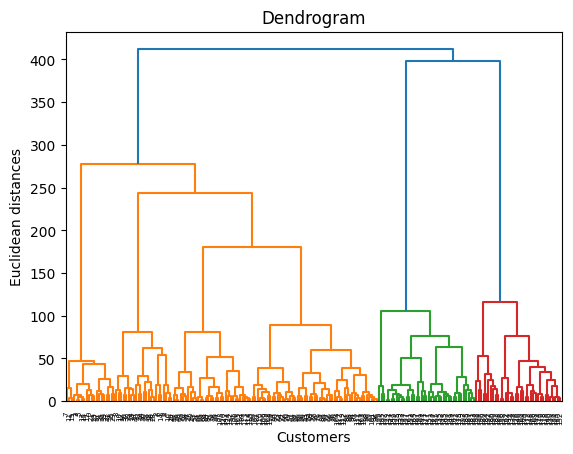

In [43]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5,linkage='ward')
y = model.fit_predict(X)

In [45]:
from sklearn.decomposition import PCA
labels = model.labels_

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

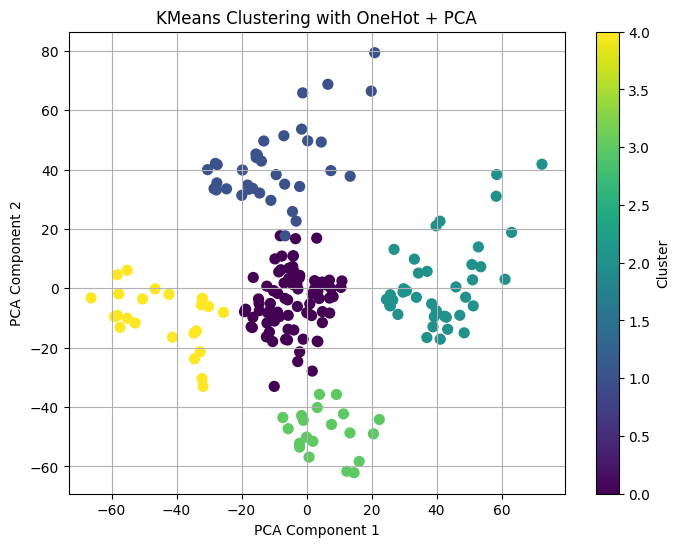

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering with OneHot + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()